In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

#Oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
def split_dataset(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=221)
    return X_train, X_test, y_train, y_test

In [3]:
def evaluar_modelo(y_test, y_pred):
        matriz_confusion = confusion_matrix(y_test, y_pred)
        #print(matriz_confusion)
        # Crear una figura
        fig = plt.figure(figsize=(10, 8))

        # Crear el mapa de calor utilizando seaborn
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="YlGnBu")

        # Configurar etiquetas y título del gráfico
        plt.xlabel('Clase Predicha')
        plt.ylabel('Clase Verdadera')
        plt.title('Matriz de Confusión')
        plt.show()

        reporte_clasificacion = classification_report(y_test, y_pred)
        return reporte_clasificacion

In [4]:
def probar_modelos(modelos,nombres, x_train, x_test, y_train, y_test, plot_matrix):
    df_resultados = pd.DataFrame()
    for modelo , name in zip (modelos, nombres):
        print(name)
        nombre_modelo = type(modelo).__name__
        modelo.fit(x_train, y_train)
        y_pred = modelo.predict(x_test)
        reporte_clasificacion = evaluar_modelo(y_test, y_pred)
        print(reporte_clasificacion)
    return df_resultados

In [5]:
def normalizar_datos(X):
    scaler = StandardScaler()
    dataset_normalizada = scaler.fit_transform(X)
    X_normalizada = dataset_normalizada.copy()
    return X_normalizada

In [6]:
def encoder_datos (df_data, columnas):
    le = LabelEncoder()
    for columna in columnas:
        df_data[columna] = le.fit_transform(df_data[columna])
    return df_data

In [7]:
def oversampling_datos(X_train, y_train):
    oversampler = RandomOverSampler(random_state = 1)
    X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)
    return X_train_os, y_train_os

In [8]:
def oversampling_datos (X_train, y_train):
    oversampler = SMOTE(random_state = 1)
    X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

In [13]:
df_data = pd.read_csv(r'Data_preprocesamiento.csv', index_col = False)

In [14]:
df_data

,Unnamed: 0,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,...,R_CLINCH_LANDED,R_CLINCH_TOTAL,B_CLINCH_LANDED,B_CLINCH_TOTAL,R_GROUND_LANDED,R_GROUND_TOTAL,B_GROUND_LANDED,B_GROUND_TOTAL,weightclass,titlebout
0,0,2,0,39,45,0,0,0,0,0,...,0,0,0,0,0,1,0,0,bantamweight,0
1,1,0,0,47,47,50,33,1,2,0,...,4,5,3,6,8,10,1,2,middleweight,0
2,2,1,0,77,33,0,0,0,0,0,...,0,0,0,0,5,8,0,0,heavyweight,0
3,3,0,0,47,36,0,80,0,2,3,...,2,2,0,0,3,7,0,0,womens strawweight,0
4,4,0,0,47,36,50,100,0,0,0,...,5,9,13,15,0,0,2,4,womens bantamweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,6006,0,0,60,0,0,100,5,0,4,...,0,0,0,0,1,1,0,0,other,0
5886,6007,0,0,66,33,100,0,1,0,0,...,0,0,0,0,4,5,0,2,other,0
5887,6008,0,0,66,33,0,100,0,1,0,...,0,0,0,0,7,9,0,0,other,0
5888,6009,0,0,64,80,100,0,0,0,0,...,1,1,2,2,9,15,1,1,other,0


In [19]:
df_data.columns

Index(['Unnamed: 0', 'R_KD', 'B_KD', 'R_SIG_STR_pct', 'B_SIG_STR_pct',
       'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT', 'R_REV', 'B_REV',
       'R_CTRL', 'B_CTRL', 'Height_Red', 'Weight_Red', 'Stance_Red',
       'SLpM_Red', 'Str_Acc_Red', 'SApM_Red', 'Str_Def_Red', 'TD_Avg_Red',
       'TD_Acc_Red', 'TD_Def_Red', 'Sub_Avg_Red', 'Height_Blue', 'Weight_Blue',
       'Stance_Blue', 'SLpM_Blue', 'Str_Acc_Blue', 'SApM_Blue', 'Str_Def_Blue',
       'TD_Avg_Blue', 'TD_Acc_Blue', 'TD_Def_Blue', 'Sub_Avg_Blue',
       'winner_color', 'R_SIG_STRIKE_LANDED', 'R_SIG_STRIKE_TOTAL',
       'B_SIG_STRIKE_LANDED', 'B_SIG_STRIKE_TOTAL', 'R_TOTAL_STRIKE_LANDED',
       'R_TOTAL_STRIKE_TOTAL', 'B_TOTAL_STRIKE_LANDED', 'B_TOTAL_STRIKE_TOTAL',
       'R_TD_STRIKE_LANDED', 'R_TD_STRIKE_TOTAL', 'B_TD_STRIKE_LANDED',
       'B_TD_STRIKE_TOTAL', 'R_HEAD_LANDED', 'R_HEAD_TOTAL', 'B_HEAD_LANDED',
       'B_HEAD_TOTAL', 'R_BODY_LANDED', 'R_BODY_TOTAL', 'B_BODY_LANDED',
       'B_BODY_TOTAL', 'R_LEG_LAND

In [15]:
modelos = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
modelos_name = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']

In [27]:
df_data2 = df_data.copy()
df_data3 = df_data.copy()
le = LabelEncoder()
columnas_label_encoder = ['weightclass', 'Stance_Red', 'Stance_Blue']
for columna in columnas_label_encoder:
    df_data[columna] = le.fit_transform(df_data[columna])

In [20]:
df_data['winner_color'].value_counts()

1    3968
0    1922
Name: winner_color, dtype: int64

In [28]:
df_data['Stance_Red'].value_counts()

1    4469
3    1209
4     195
0      15
2       2
Name: Stance_Red, dtype: int64

# Datos sin preprocesar

In [30]:
y = df_data.winner_color
X = df_data.copy()
X = X.drop(['winner_color'], axis=1)

In [31]:
X_train, X_test, y_train, y_test = split_dataset(X,y)
len(X_train), len(X_test)

(4123, 1767)

LogisticRegression


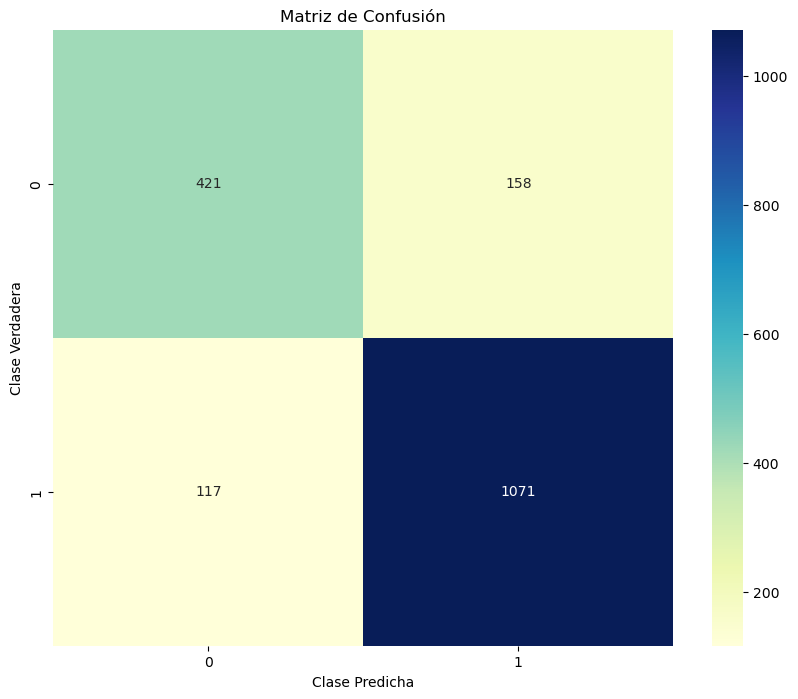

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       579
           1       0.87      0.90      0.89      1188

    accuracy                           0.84      1767
   macro avg       0.83      0.81      0.82      1767
weighted avg       0.84      0.84      0.84      1767

DecisionTreeClassifier


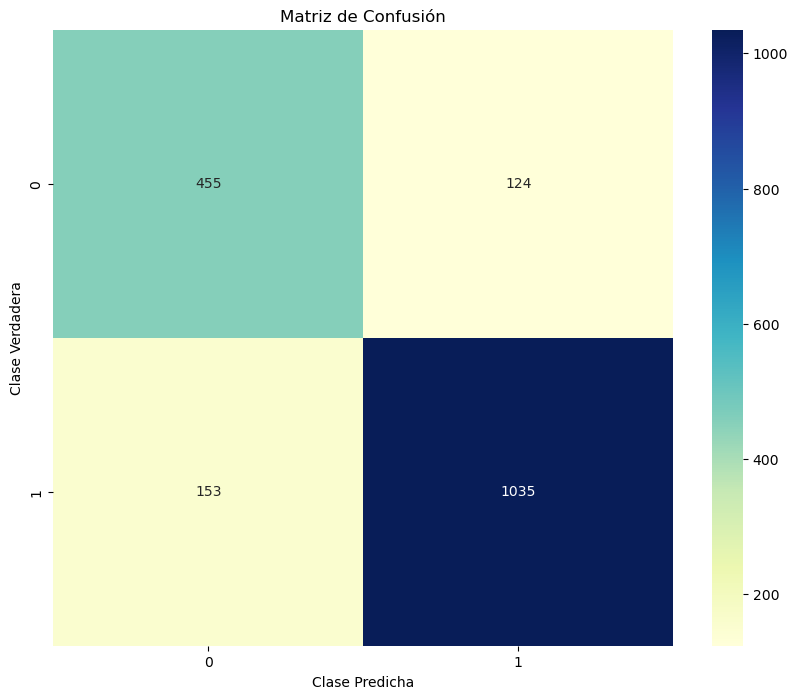

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       579
           1       0.89      0.87      0.88      1188

    accuracy                           0.84      1767
   macro avg       0.82      0.83      0.82      1767
weighted avg       0.85      0.84      0.84      1767

RandomForestClassifier


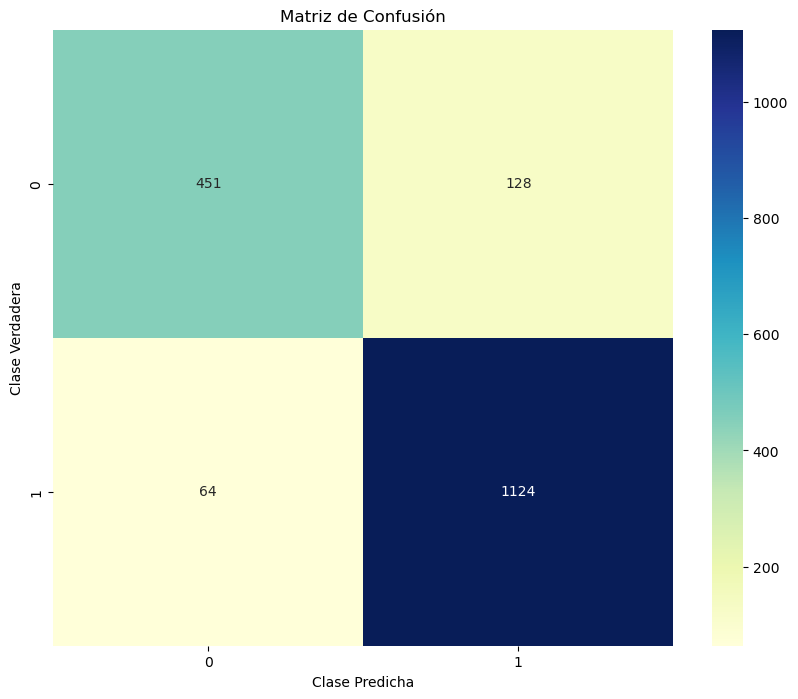

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       579
           1       0.90      0.95      0.92      1188

    accuracy                           0.89      1767
   macro avg       0.89      0.86      0.87      1767
weighted avg       0.89      0.89      0.89      1767

GradientBoostingClassifier


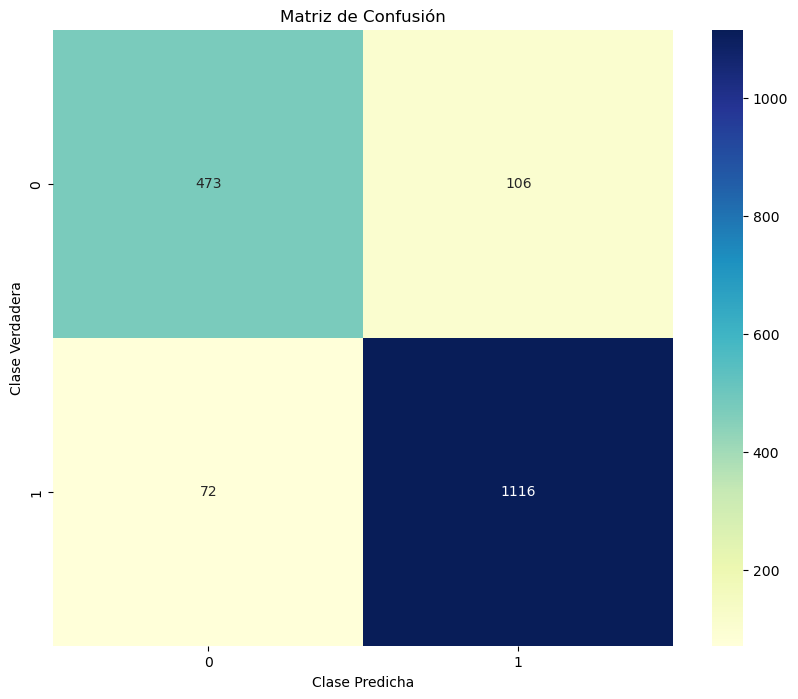

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       579
           1       0.91      0.94      0.93      1188

    accuracy                           0.90      1767
   macro avg       0.89      0.88      0.88      1767
weighted avg       0.90      0.90      0.90      1767



In [32]:
df_resultados=probar_modelos(modelos,modelos_name, X_train, X_test, y_train, y_test, 'yes')

# Datos normalizados

LogisticRegression


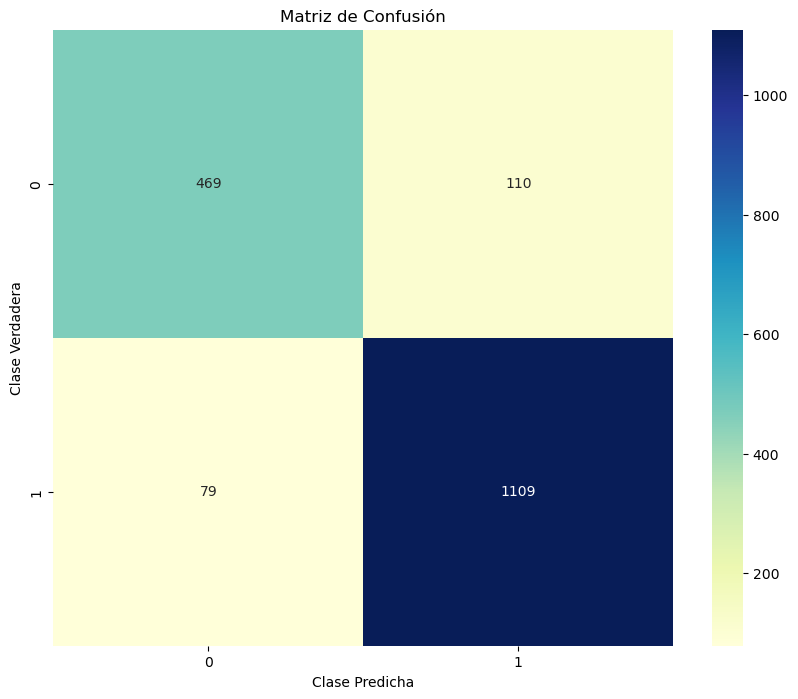

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       579
           1       0.91      0.93      0.92      1188

    accuracy                           0.89      1767
   macro avg       0.88      0.87      0.88      1767
weighted avg       0.89      0.89      0.89      1767

DecisionTreeClassifier


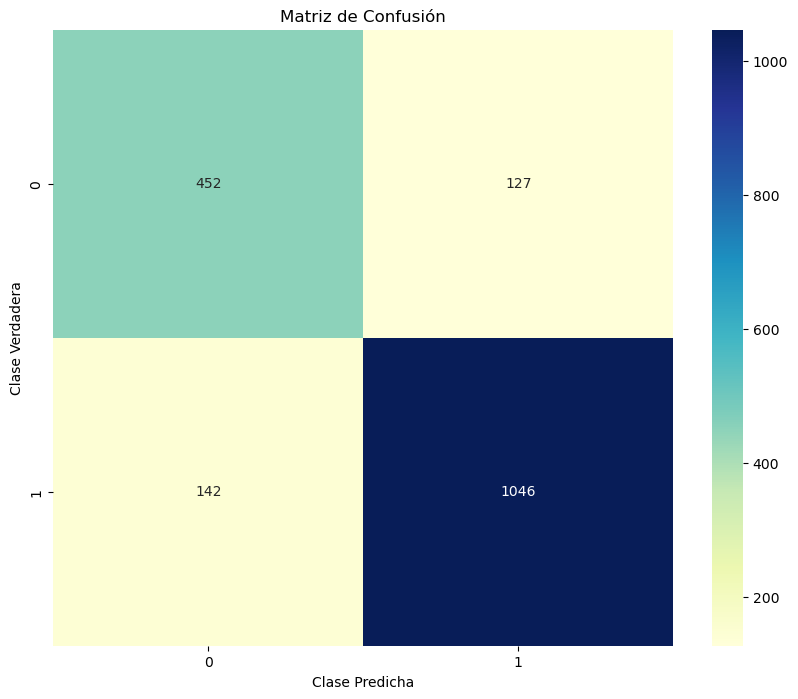

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       579
           1       0.89      0.88      0.89      1188

    accuracy                           0.85      1767
   macro avg       0.83      0.83      0.83      1767
weighted avg       0.85      0.85      0.85      1767

RandomForestClassifier


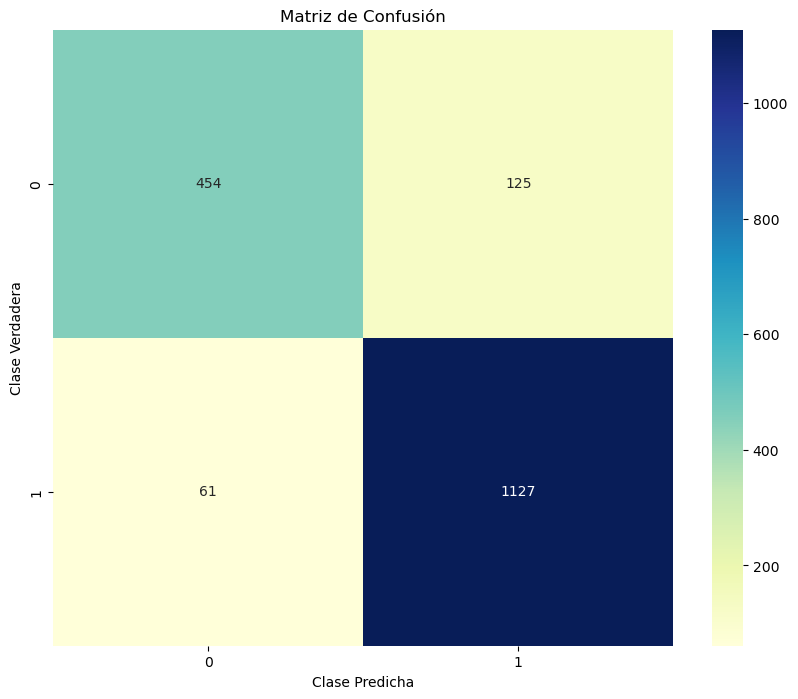

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       579
           1       0.90      0.95      0.92      1188

    accuracy                           0.89      1767
   macro avg       0.89      0.87      0.88      1767
weighted avg       0.89      0.89      0.89      1767

GradientBoostingClassifier


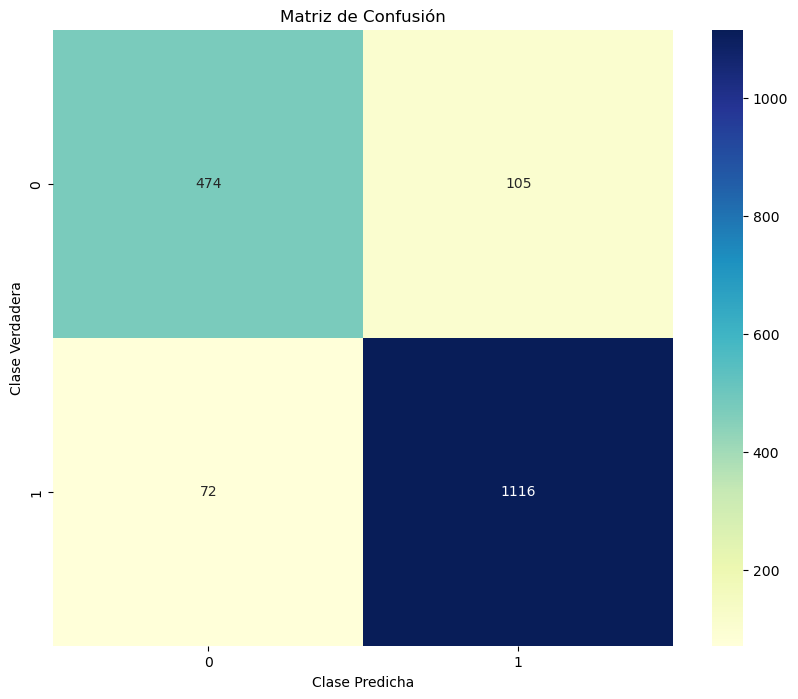

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       579
           1       0.91      0.94      0.93      1188

    accuracy                           0.90      1767
   macro avg       0.89      0.88      0.88      1767
weighted avg       0.90      0.90      0.90      1767



In [33]:
scaler = StandardScaler()
dataset_normalizada = scaler.fit_transform(X)
X_normalizada = dataset_normalizada.copy()
X_train_nom, X_test_nom, y_train, y_test = split_dataset(X_normalizada,y)
df_resultados=probar_modelos(modelos,modelos_name, X_train_nom, X_test_nom, y_train, y_test, 'yes')

# Datos con Oversampling

In [34]:
oversampler = RandomOverSampler(random_state = 1)
X_train_os, y_train_os = oversampler.fit_resample(X_train_nom, y_train)
y_train_os.value_counts()

1    2780
0    2780
Name: winner_color, dtype: int64

LogisticRegression


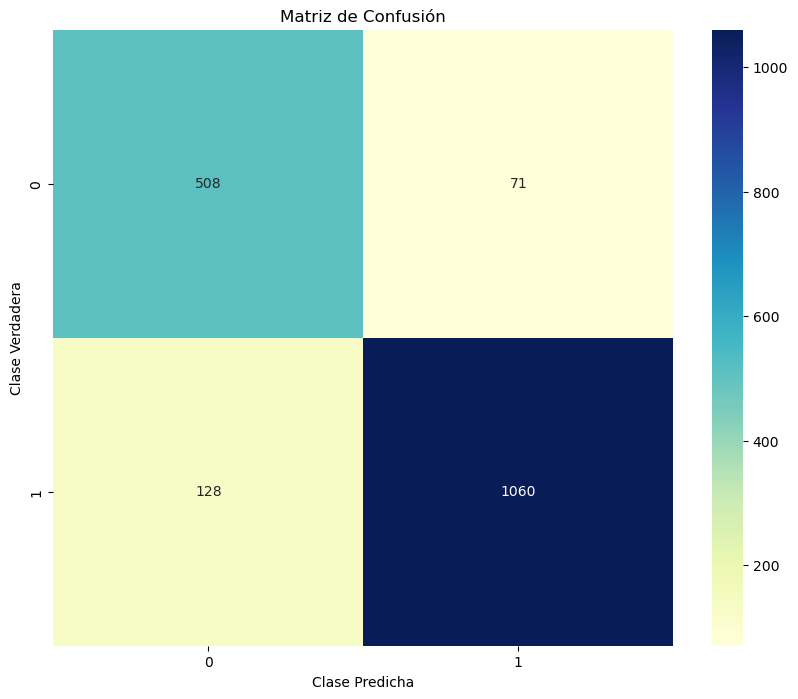

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       579
           1       0.94      0.89      0.91      1188

    accuracy                           0.89      1767
   macro avg       0.87      0.88      0.88      1767
weighted avg       0.89      0.89      0.89      1767

DecisionTreeClassifier


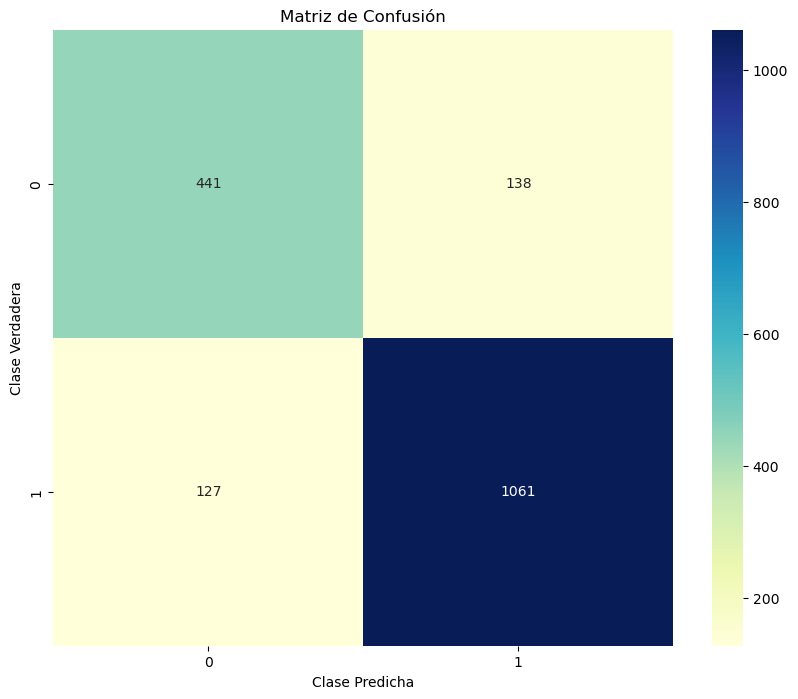

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       579
           1       0.88      0.89      0.89      1188

    accuracy                           0.85      1767
   macro avg       0.83      0.83      0.83      1767
weighted avg       0.85      0.85      0.85      1767

RandomForestClassifier


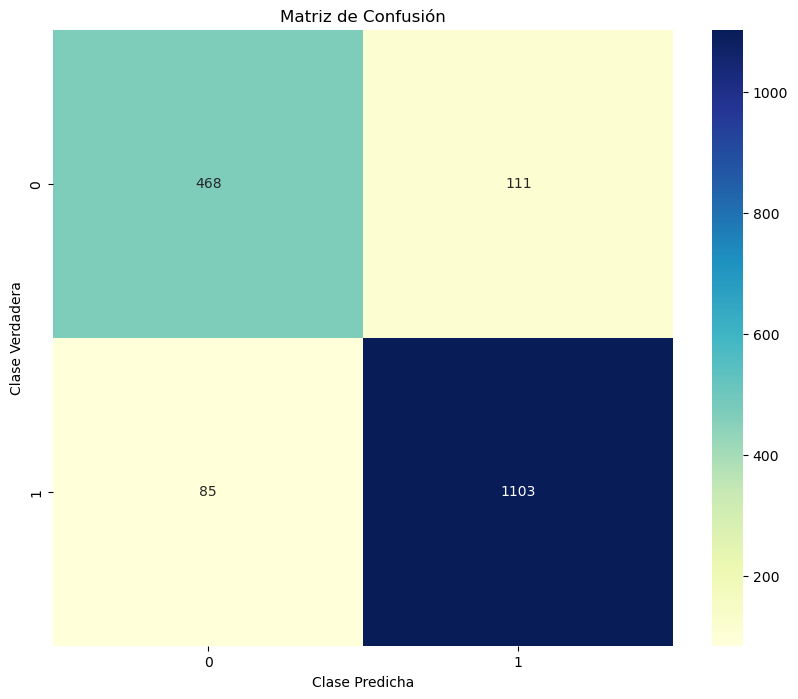

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       579
           1       0.91      0.93      0.92      1188

    accuracy                           0.89      1767
   macro avg       0.88      0.87      0.87      1767
weighted avg       0.89      0.89      0.89      1767

GradientBoostingClassifier


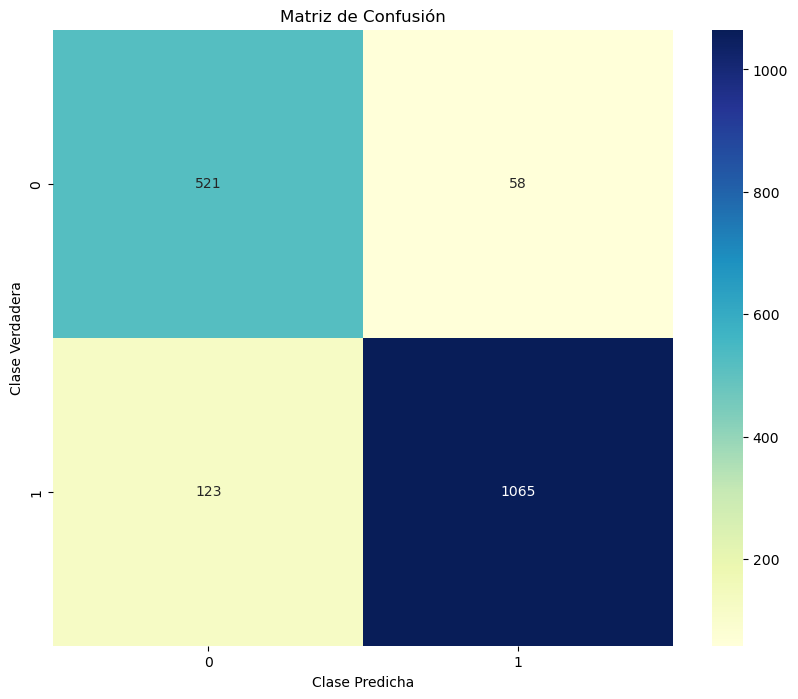

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       579
           1       0.95      0.90      0.92      1188

    accuracy                           0.90      1767
   macro avg       0.88      0.90      0.89      1767
weighted avg       0.90      0.90      0.90      1767



In [35]:
df_resultados=probar_modelos(modelos,modelos_name, X_train_os, X_test_nom, y_train_os, y_test, 'yes')

LogisticRegression


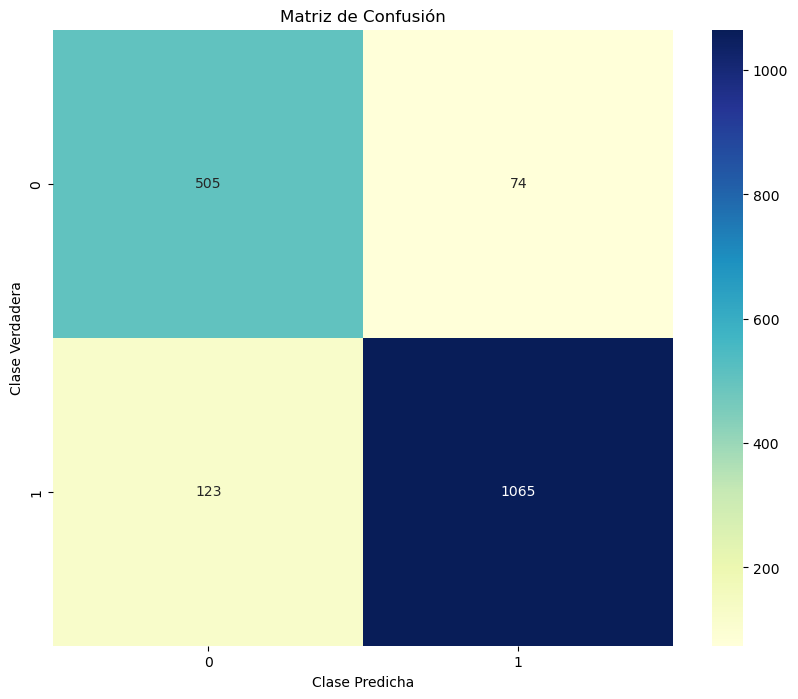

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       579
           1       0.94      0.90      0.92      1188

    accuracy                           0.89      1767
   macro avg       0.87      0.88      0.88      1767
weighted avg       0.89      0.89      0.89      1767

DecisionTreeClassifier


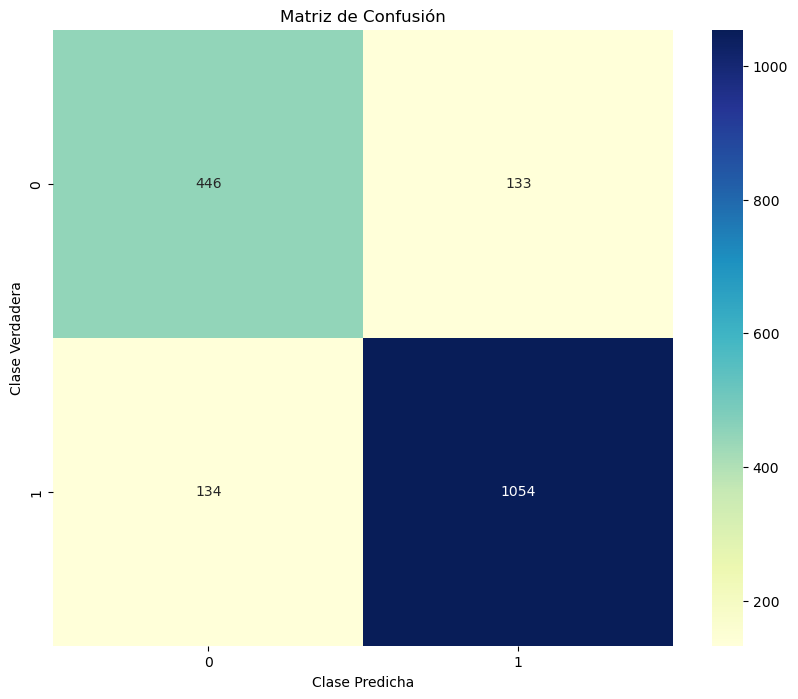

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       579
           1       0.89      0.89      0.89      1188

    accuracy                           0.85      1767
   macro avg       0.83      0.83      0.83      1767
weighted avg       0.85      0.85      0.85      1767

RandomForestClassifier


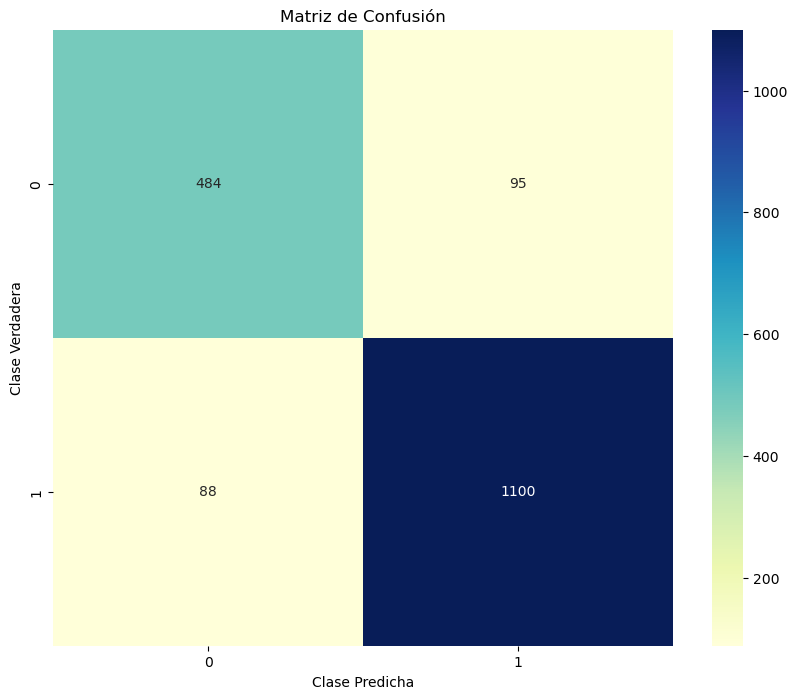

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       579
           1       0.92      0.93      0.92      1188

    accuracy                           0.90      1767
   macro avg       0.88      0.88      0.88      1767
weighted avg       0.90      0.90      0.90      1767

GradientBoostingClassifier


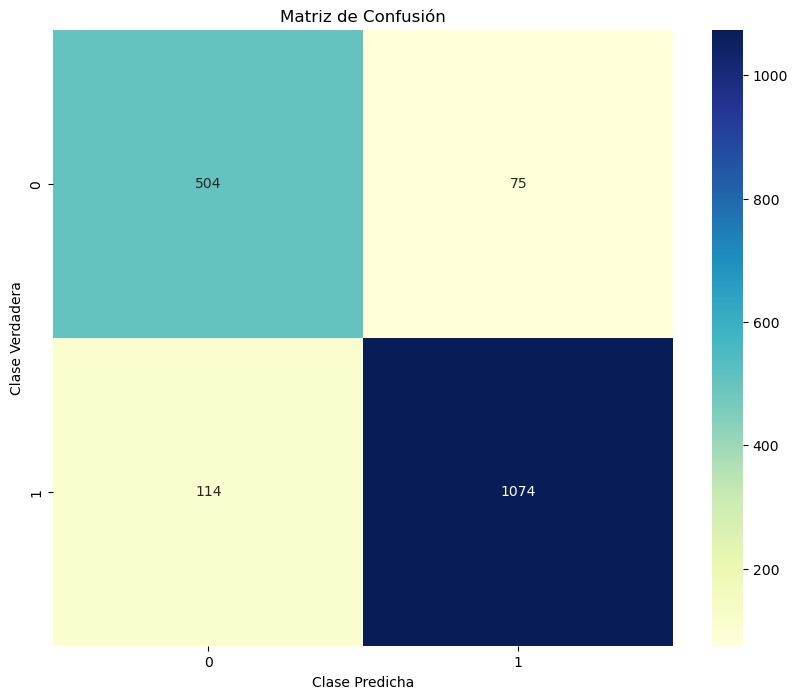

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       579
           1       0.93      0.90      0.92      1188

    accuracy                           0.89      1767
   macro avg       0.88      0.89      0.88      1767
weighted avg       0.90      0.89      0.89      1767



In [36]:
oversampler = SMOTE(random_state = 1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train_nom, y_train)
df_resultados=probar_modelos(modelos,modelos_name, X_train_smote, X_test_nom, y_train_smote, y_test, 'yes')

# Future Selection

### Random Forest 

In [152]:
X_variables = X.drop(['title_bout','location','date', 'R_fighter', 'B_fighter'], axis=1)
scaler = StandardScaler()
dataset_normalizada = scaler.fit_transform(X_variables)
X_normalizada = dataset_normalizada.copy()
X_train_var, X_test_var, y_train, y_test = split_dataset(X_normalizada,y)

model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10)

model.fit(X_train_var, y_train)

y_pred = model.predict(X_test_var)

print("Test Accuracy of Random Forest : ",model.score(X_test_var,y_test))

Test Accuracy of Random Forest :  0.6618625277161863


In [153]:
sorted_idx = model.feature_importances_.argsort()
featureImp = pd.DataFrame(columns=['Variables','Importance'])
featureImp['Variables']=list(X_variables.columns[sorted_idx])
featureImp['Importance']=list(model.feature_importances_[sorted_idx])
# plt.barh(featureImp.Variables,featureImp.Importance)
# plt.xlabel("Random Forest Feature Importance")
featureImp = featureImp.sort_values(by='Importance', ascending=False)[:10]
featureImp

,Variables,Importance
138,R_age,0.019626
137,R_avg_opp_HEAD_landed,0.018540
136,B_age,0.017965
135,B_Reach_cms,0.015940
134,R_avg_opp_BODY_att,0.015558
133,R_avg_opp_DISTANCE_landed,0.015263
132,R_avg_opp_SIG_STR_pct,0.013805
131,R_avg_opp_BODY_landed,0.012980
130,B_avg_DISTANCE_landed,0.012813
129,B_avg_SIG_STR_att,0.012722


In [154]:
variables_lista = list(featureImp['Variables'].unique())
X_var_importance = X.loc[:,variables_lista].copy()
X_var_importance

,R_age,R_avg_opp_HEAD_landed,B_age,B_Reach_cms,R_avg_opp_BODY_att,R_avg_opp_DISTANCE_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_BODY_landed,B_avg_DISTANCE_landed,B_avg_SIG_STR_att
0,27.0,5.000000,31.0,170.18,2.000000,6.000000,0.460000,1.000000,12.5,50.0000
1,28.0,13.343750,32.0,193.04,9.093750,23.125000,0.381250,6.156250,30.0,65.5000
2,28.0,17.937500,32.0,190.50,6.125000,18.687500,0.598594,3.718750,0.0,0.0000
3,25.0,0.000000,28.0,154.94,0.000000,0.000000,0.000000,0.000000,0.0,0.0000
4,43.0,38.693359,29.0,182.88,37.717773,48.479492,0.554961,31.658203,11.0,109.1875
...,...,...,...,...,...,...,...,...,...,...
6007,0.0,0.000000,0.0,183.13,0.000000,0.000000,0.000000,0.000000,0.0,0.0000
6008,0.0,0.000000,0.0,186.48,0.000000,0.000000,0.000000,0.000000,0.0,0.0000
6009,0.0,0.000000,0.0,186.48,0.000000,0.000000,0.000000,0.000000,0.0,0.0000
6010,30.0,0.000000,0.0,186.48,0.000000,0.000000,0.000000,0.000000,0.0,0.0000


In [155]:
columnas_importancia = list(X_var_importance.columns)

In [156]:
le = LabelEncoder()
for columna in columnas_importancia:
    X_var_importance[columna] = le.fit_transform(X_var_importance[columna])

In [157]:
X_train_var, X_test_var, y_train, y_test = split_dataset(X_var_importance,y)
model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10)

model.fit(X_train_var, y_train)

y_pred = model.predict(X_test_var)

print("Test Accuracy of Random Forest : ",model.score(X_test_var,y_test))

Test Accuracy of Random Forest :  0.6701773835920177


In [133]:
label_encoder = LabelEncoder()
targetVariable = label_encoder.fit_transform(y)

LogisticRegression


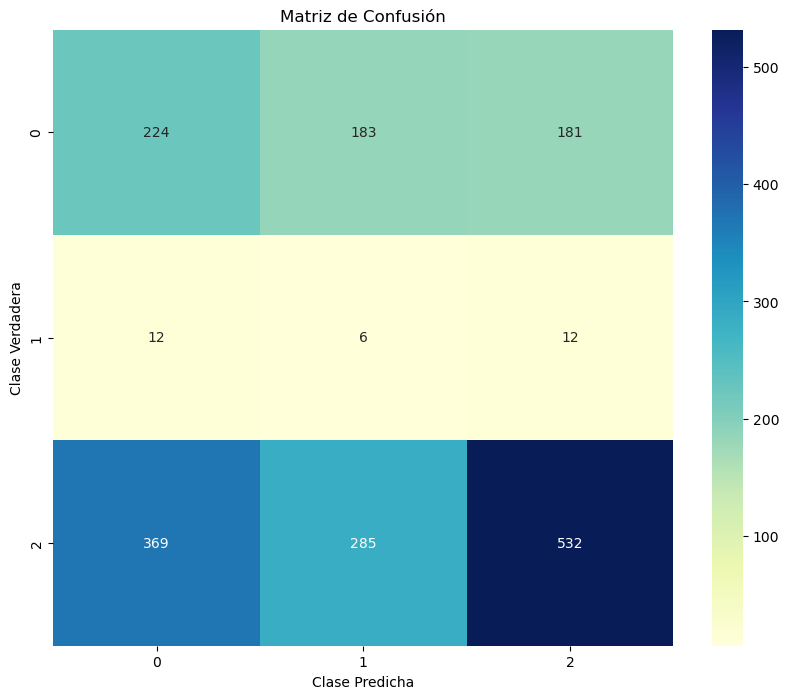

              precision    recall  f1-score   support

           0       0.37      0.38      0.38       588
           1       0.01      0.20      0.02        30
           2       0.73      0.45      0.56      1186

    accuracy                           0.42      1804
   macro avg       0.37      0.34      0.32      1804
weighted avg       0.60      0.42      0.49      1804

DecisionTreeClassifier


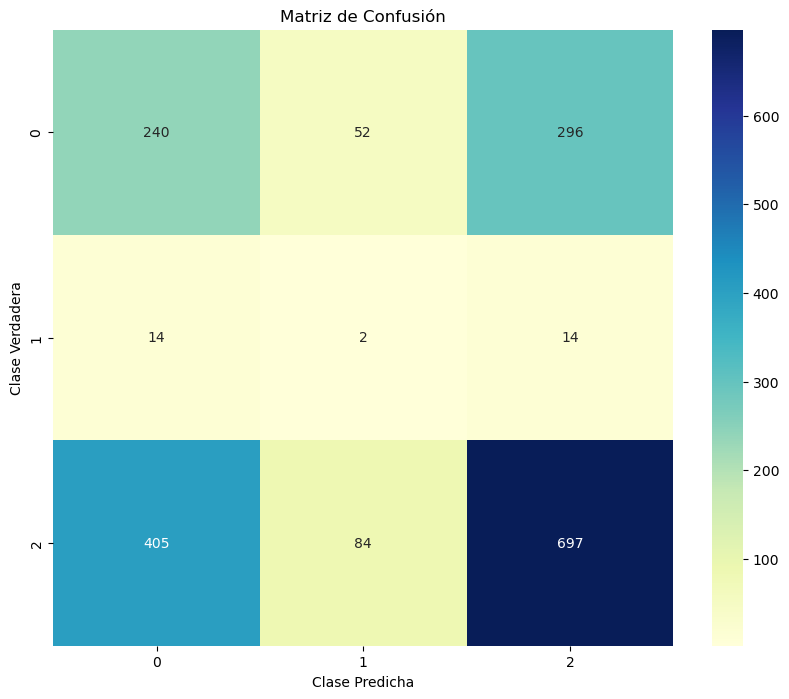

              precision    recall  f1-score   support

           0       0.36      0.41      0.38       588
           1       0.01      0.07      0.02        30
           2       0.69      0.59      0.64      1186

    accuracy                           0.52      1804
   macro avg       0.36      0.35      0.35      1804
weighted avg       0.57      0.52      0.54      1804

RandomForestClassifier


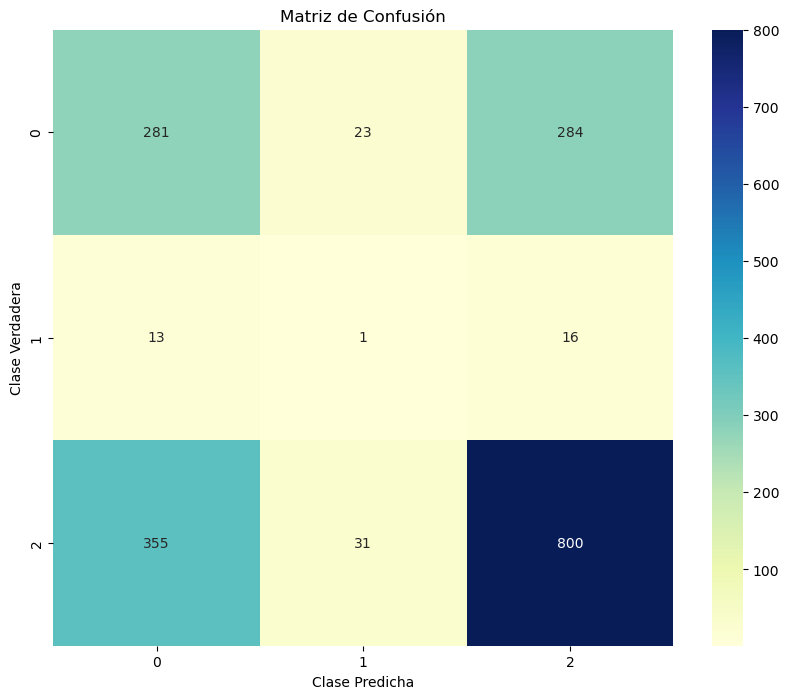

              precision    recall  f1-score   support

           0       0.43      0.48      0.45       588
           1       0.02      0.03      0.02        30
           2       0.73      0.67      0.70      1186

    accuracy                           0.60      1804
   macro avg       0.39      0.40      0.39      1804
weighted avg       0.62      0.60      0.61      1804

GradientBoostingClassifier


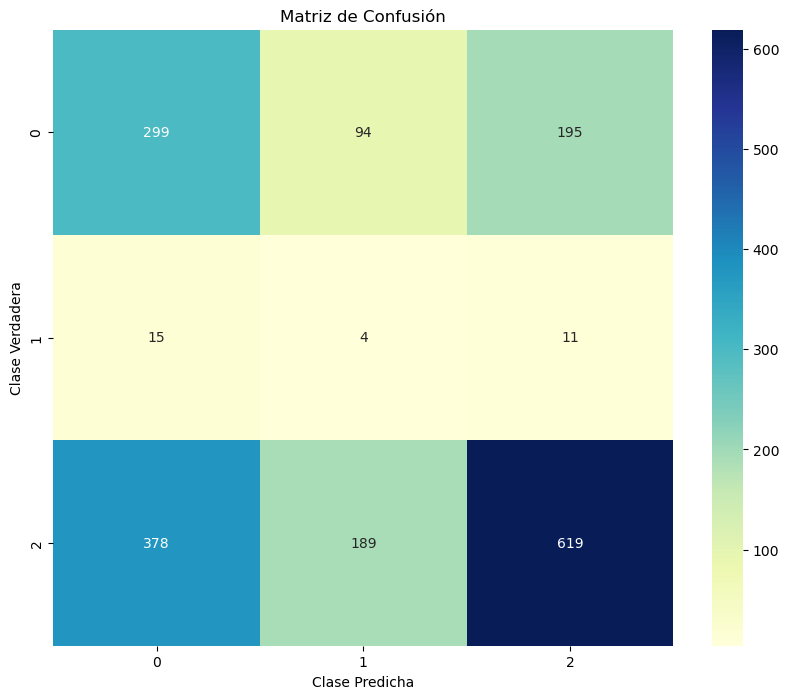

              precision    recall  f1-score   support

           0       0.43      0.51      0.47       588
           1       0.01      0.13      0.03        30
           2       0.75      0.52      0.62      1186

    accuracy                           0.51      1804
   macro avg       0.40      0.39      0.37      1804
weighted avg       0.63      0.51      0.56      1804



In [162]:
oversampler = SMOTE(random_state = 1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train_var, y_train)
df_resultados=probar_modelos(modelos,modelos_name, X_train_smote, X_test_var, y_train_smote, y_test, 'yes')

# Target de solo victoria Red o Blue

In [175]:
df_data2
df_data2 = df_data2.drop(df_data2[df_data2['Winner'] == 'Draw'].index)

In [176]:
y = df_data2.Winner
X = df_data2.copy()
X = X.drop(['Winner'], axis=1)
X = X.drop(['title_bout','location','date', 'R_fighter', 'B_fighter', 'Referee'], axis=1)

In [177]:
scaler = StandardScaler()
dataset_normalizada = scaler.fit_transform(X)
X_normalizada = dataset_normalizada.copy()
X_train_var, X_test_var, y_train, y_test = split_dataset(X_normalizada,y)

In [178]:
model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10)

model.fit(X_train_var, y_train)

y_pred = model.predict(X_test_var)

print("Test Accuracy of Random Forest : ",model.score(X_test_var,y_test))

Test Accuracy of Random Forest :  0.6674057649667405


In [179]:
sorted_idx = model.feature_importances_.argsort()
featureImp = pd.DataFrame(columns=['Variables','Importance'])
featureImp['Variables']=list(X.columns[sorted_idx])
featureImp['Importance']=list(model.feature_importances_[sorted_idx])
# plt.barh(featureImp.Variables,featureImp.Importance)
# plt.xlabel("Random Forest Feature Importance")
featureImp = featureImp.sort_values(by='Importance', ascending=False)[:10]
featureImp

,Variables,Importance
137,R_age,0.018683
136,R_avg_opp_HEAD_landed,0.017240
135,B_age,0.016494
134,R_avg_opp_DISTANCE_landed,0.015540
133,R_avg_opp_SIG_STR_pct,0.015340
132,B_Reach_cms,0.015306
131,R_avg_opp_BODY_att,0.014218
130,R_avg_opp_SIG_STR_landed,0.012669
129,R_avg_opp_HEAD_att,0.012482
128,B_avg_SIG_STR_landed,0.012238


In [180]:
variables_lista = list(featureImp['Variables'].unique())
X_var_importance = X.loc[:,variables_lista].copy()
X_var_importance

,R_age,R_avg_opp_HEAD_landed,B_age,R_avg_opp_DISTANCE_landed,R_avg_opp_SIG_STR_pct,B_Reach_cms,R_avg_opp_BODY_att,R_avg_opp_SIG_STR_landed,R_avg_opp_HEAD_att,B_avg_SIG_STR_landed
0,27.0,5.000000,31.0,6.000000,0.460000,170.18,2.000000,6.000000,11.000000,20.0000
1,28.0,13.343750,32.0,23.125000,0.381250,193.04,9.093750,27.593750,50.406250,35.0000
2,28.0,17.937500,32.0,18.687500,0.598594,190.50,6.125000,24.796875,34.296875,0.0000
3,25.0,0.000000,28.0,0.000000,0.000000,154.94,0.000000,0.000000,0.000000,0.0000
4,43.0,38.693359,29.0,48.479492,0.554961,182.88,37.717773,84.554688,94.225586,57.9375
...,...,...,...,...,...,...,...,...,...,...
6007,0.0,0.000000,0.0,0.000000,0.000000,183.13,0.000000,0.000000,0.000000,0.0000
6008,0.0,0.000000,0.0,0.000000,0.000000,186.48,0.000000,0.000000,0.000000,0.0000
6009,0.0,0.000000,0.0,0.000000,0.000000,186.48,0.000000,0.000000,0.000000,0.0000
6010,30.0,0.000000,0.0,0.000000,0.000000,186.48,0.000000,0.000000,0.000000,0.0000


LogisticRegression


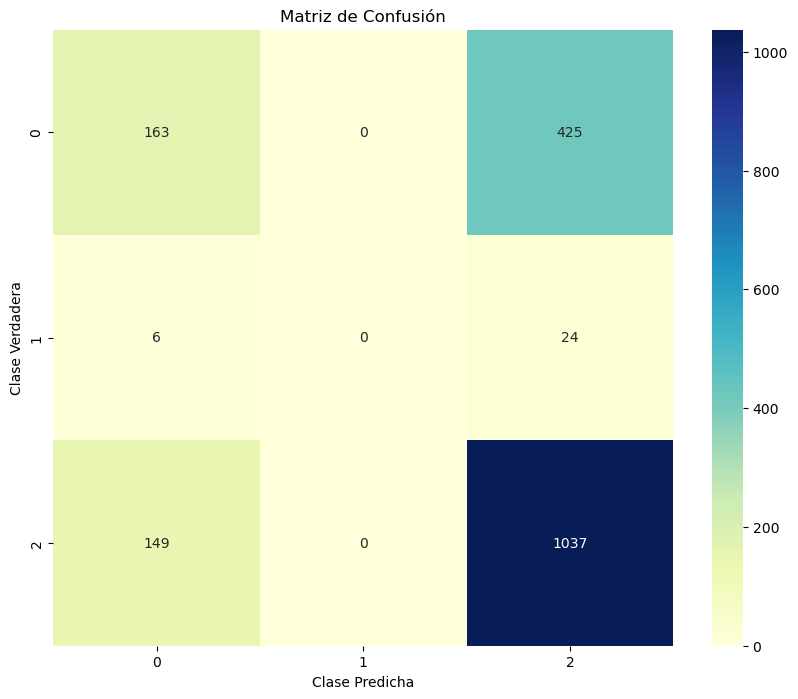

              precision    recall  f1-score   support

           0       0.51      0.28      0.36       588
           1       0.00      0.00      0.00        30
           2       0.70      0.87      0.78      1186

    accuracy                           0.67      1804
   macro avg       0.40      0.38      0.38      1804
weighted avg       0.63      0.67      0.63      1804

DecisionTreeClassifier


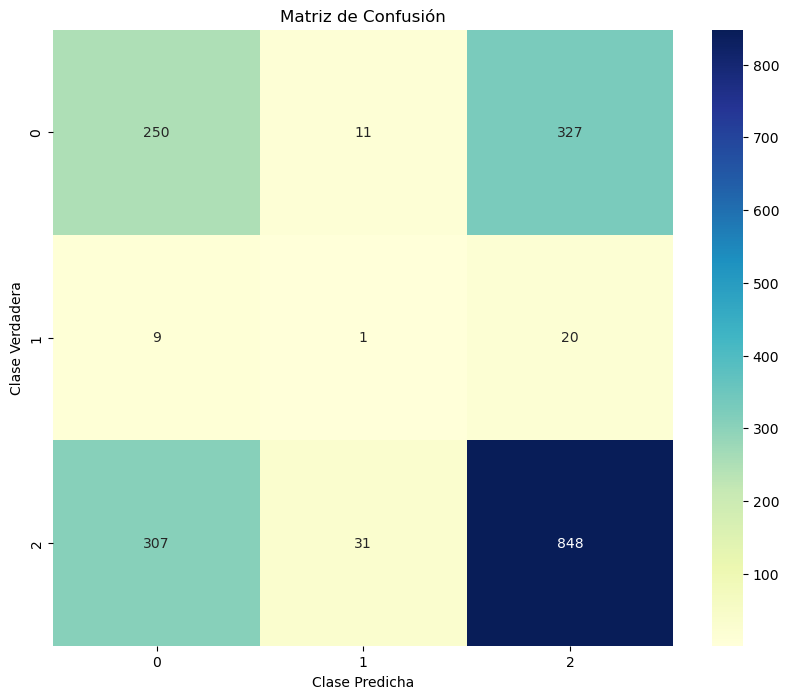

              precision    recall  f1-score   support

           0       0.44      0.43      0.43       588
           1       0.02      0.03      0.03        30
           2       0.71      0.72      0.71      1186

    accuracy                           0.61      1804
   macro avg       0.39      0.39      0.39      1804
weighted avg       0.61      0.61      0.61      1804

RandomForestClassifier


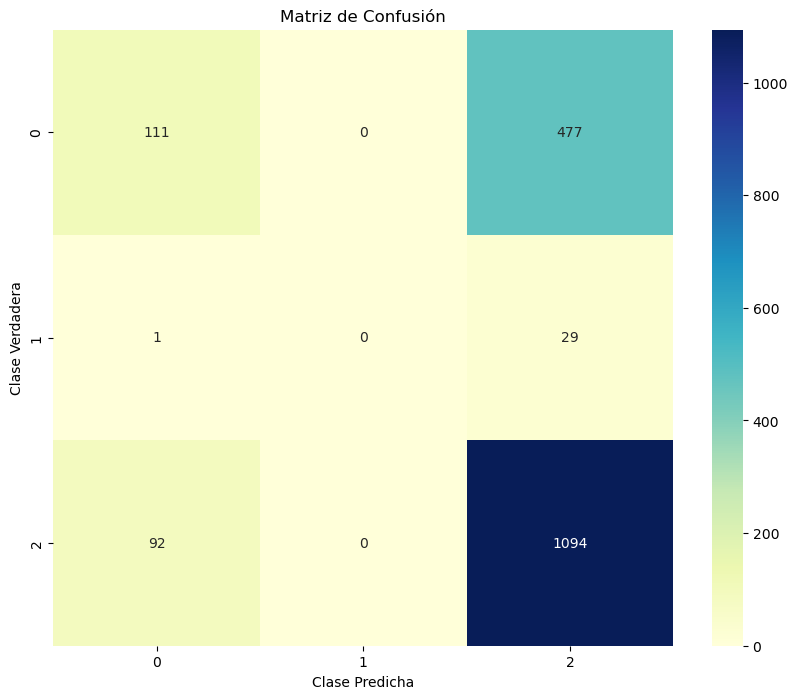

              precision    recall  f1-score   support

           0       0.54      0.19      0.28       588
           1       0.00      0.00      0.00        30
           2       0.68      0.92      0.79      1186

    accuracy                           0.67      1804
   macro avg       0.41      0.37      0.36      1804
weighted avg       0.63      0.67      0.61      1804

GradientBoostingClassifier


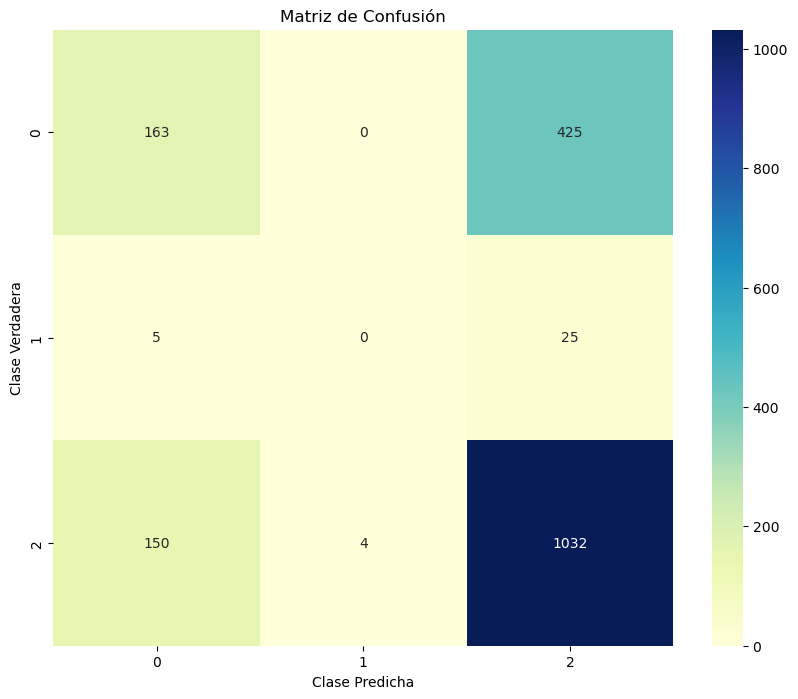

              precision    recall  f1-score   support

           0       0.51      0.28      0.36       588
           1       0.00      0.00      0.00        30
           2       0.70      0.87      0.77      1186

    accuracy                           0.66      1804
   macro avg       0.40      0.38      0.38      1804
weighted avg       0.62      0.66      0.63      1804



""


In [183]:
columnas_importancia = list(X_var_importance.columns)
le = LabelEncoder()
for columna in columnas_importancia:
    X_var_importance[columna] = le.fit_transform(X_var_importance[columna])
X_train_var, X_test_var, y_train, y_test = split_dataset(X_var_importance,y)
df_resultados=probar_modelos(modelos,modelos_name, X_train, X_test, y_train, y_test, 'no')

In [91]:
#df_resultados=probar_modelos(modelos,modelos_name, X_train, X_test, y_train, y_test, 'yes')

In [105]:
scaler = StandardScaler()
dataset_normalizada = scaler.fit_transform(X)
X_normalizada = dataset_normalizada.copy()
X_train_nom, X_test_nom, y_train, y_test = split_dataset(X_normalizada,y)
#df_resultados=probar_modelos(modelos,modelos_name, X_train_nom, X_test_nom, y_train, y_test, 'yes')

In [93]:
oversampler = RandomOverSampler(random_state = 1)
X_train_os, y_train_os = oversampler.fit_resample(X_train_nom, y_train)
y_train_os.value_counts()

1    2801
0    2801
Name: Winner, dtype: int64

In [106]:
#df_resultados=probar_modelos(modelos,modelos_name, X_train_os, X_test_nom, y_train_os, y_test, 'yes')

LogisticRegression


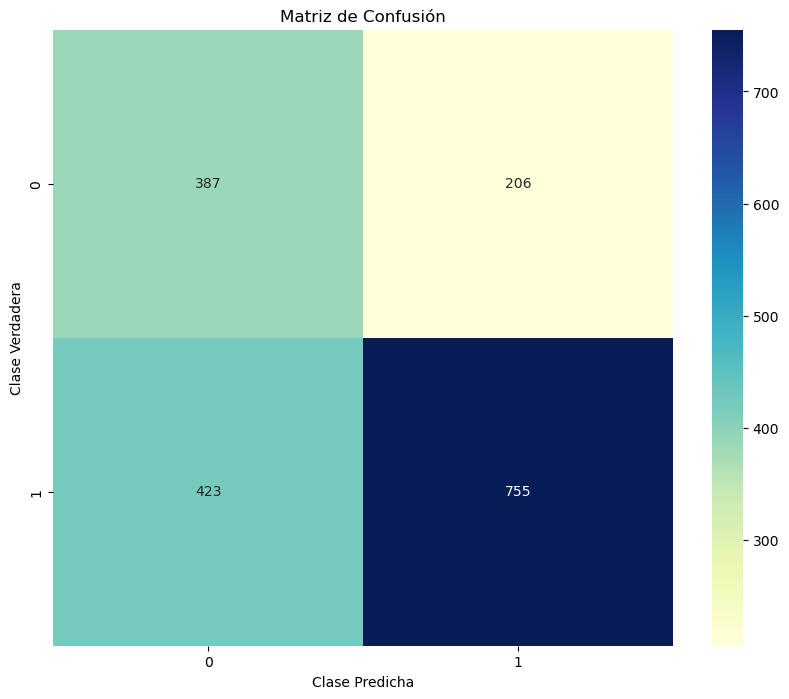

              precision    recall  f1-score   support

           0       0.48      0.65      0.55       593
           1       0.79      0.64      0.71      1178

    accuracy                           0.64      1771
   macro avg       0.63      0.65      0.63      1771
weighted avg       0.68      0.64      0.65      1771

DecisionTreeClassifier


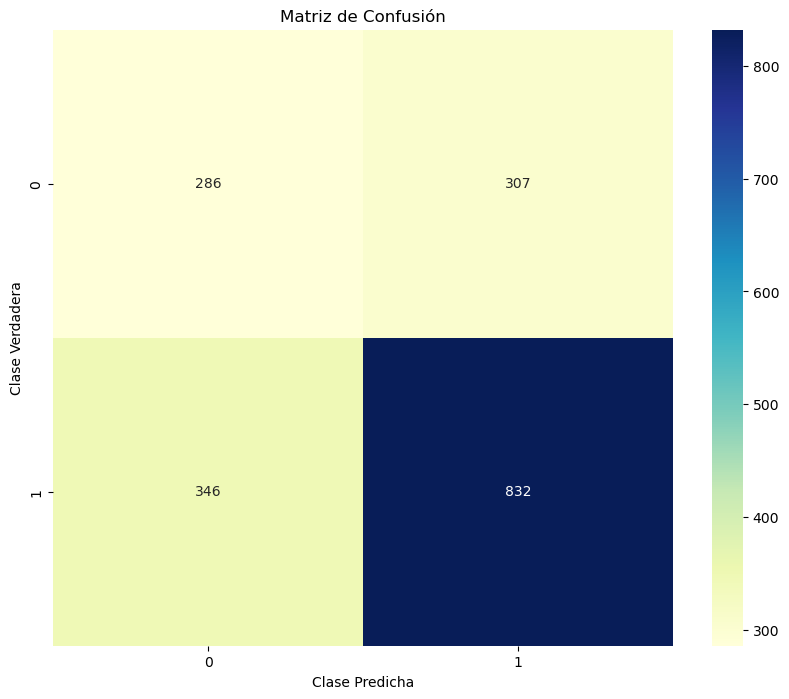

              precision    recall  f1-score   support

           0       0.45      0.48      0.47       593
           1       0.73      0.71      0.72      1178

    accuracy                           0.63      1771
   macro avg       0.59      0.59      0.59      1771
weighted avg       0.64      0.63      0.63      1771

RandomForestClassifier


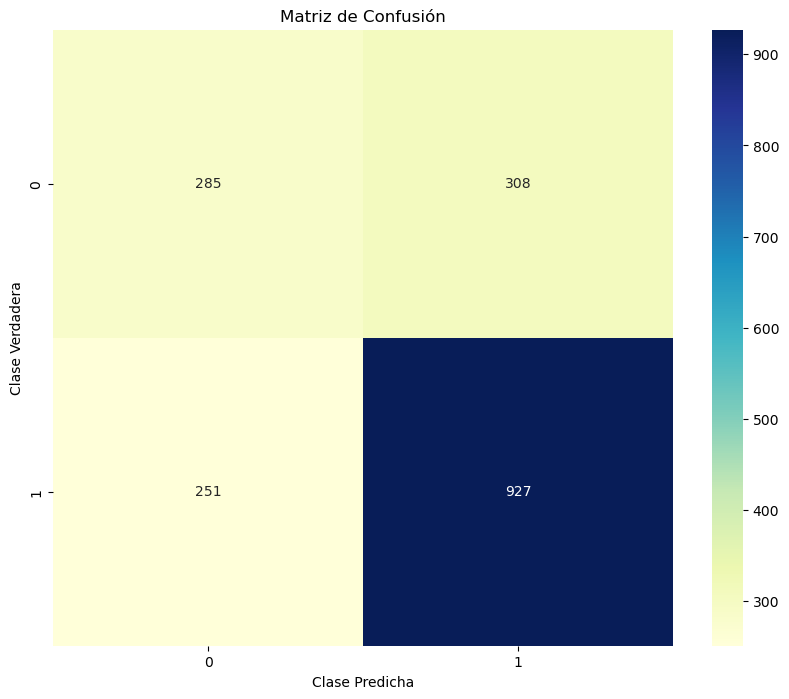

              precision    recall  f1-score   support

           0       0.53      0.48      0.50       593
           1       0.75      0.79      0.77      1178

    accuracy                           0.68      1771
   macro avg       0.64      0.63      0.64      1771
weighted avg       0.68      0.68      0.68      1771

GradientBoostingClassifier


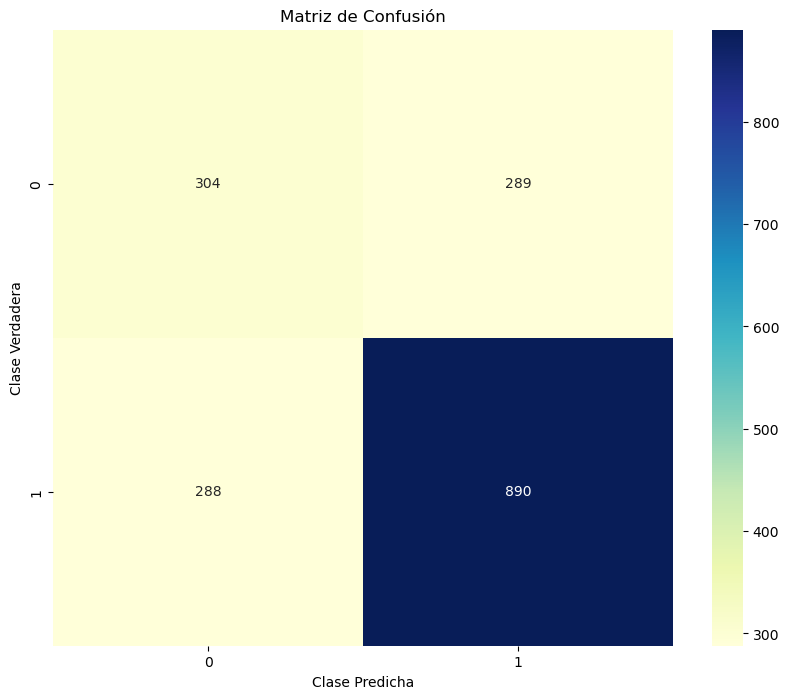

              precision    recall  f1-score   support

           0       0.51      0.51      0.51       593
           1       0.75      0.76      0.76      1178

    accuracy                           0.67      1771
   macro avg       0.63      0.63      0.63      1771
weighted avg       0.67      0.67      0.67      1771



In [95]:
oversampler = SMOTE(random_state = 1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train_nom, y_train)
#df_resultados=probar_modelos(modelos,modelos_name, X_train_smote, X_test_nom, y_train_smote, y_test, 'yes')

# Eliminamos las filas que tengan error en la categoria de peso

In [96]:
df_data3 = df_data3.drop(df_data3[df_data3['Winner'] == 'Draw'].index)
df_data3 = df_data3.drop(df_data3[df_data3['weight_class'] == 'Error'].index)
df_data3

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Genre
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,0,Bantamweight,0.000,0.0,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,Male
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,0,Peso_Pactado,0.000,0.0,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,Male
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,0,Strawweight,0.000,0.0,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,Women
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,0,Bantamweight,0.125,0.0,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,Women
5,Leonardo Santos,Grant Dawson,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Blue,0,Peso_Pactado,0.000,0.0,...,2,2,0,Orthodox,182.88,190.50,155.0,27.0,41.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000,Remco Pardoel,Orlando Wiet,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,0,Peso_Pactado,0.000,0.0,...,0,1,0,Southpaw,190.50,185.31,260.0,0.0,0.0,Male
6001,Patrick Smith,Johnny Rhodes,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,0,Peso_Pactado,0.500,0.0,...,0,1,0,Orthodox,187.96,185.31,225.0,0.0,30.0,Male
6002,Johnny Rhodes,Fred Ettish,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,0,Peso_Pactado,0.000,0.0,...,1,0,0,Orthodox,182.88,185.31,210.0,0.0,0.0,Male
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,0,Peso_Pactado,0.000,0.0,...,0,0,0,Southpaw,190.50,185.31,260.0,0.0,0.0,Male


In [97]:
le = LabelEncoder()
columnas_label_encoder = ['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'weight_class', 'Genre', 'R_Stance', 'B_Stance', 'Winner']
for columna in columnas_label_encoder:
    df_data3[columna] = le.fit_transform(df_data3[columna])

In [98]:
y = df_data3.Winner
X = df_data3.copy()
X = X.drop(['Winner'], axis=1)

In [99]:
X_train, X_test, y_train, y_test = split_dataset(X,y)
len(X_train), len(X_test)

(3269, 1401)

In [100]:
#df_resultados=probar_modelos(modelos,modelos_name, X_train, X_test, y_train, y_test, 'yes')

In [101]:
scaler = StandardScaler()
dataset_normalizada = scaler.fit_transform(X)
X_normalizada = dataset_normalizada.copy()
X_train_nom, X_test_nom, y_train, y_test = split_dataset(X_normalizada,y)
#df_resultados=probar_modelos(modelos,modelos_name, X_train_nom, X_test_nom, y_train, y_test, 'yes')

In [102]:
oversampler = RandomOverSampler(random_state = 1)
X_train_os, y_train_os = oversampler.fit_resample(X_train_nom, y_train)
y_train_os.value_counts()

1    2182
0    2182
Name: Winner, dtype: int64

In [103]:
#df_resultados=probar_modelos(modelos,modelos_name, X_train_os, X_test_nom, y_train_os, y_test, 'yes')

In [104]:
oversampler = SMOTE(random_state = 1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train_nom, y_train)
#df_resultados=probar_modelos(modelos,modelos_name, X_train_smote, X_test_nom, y_train_smote, y_test, 'yes')